<a href="https://colab.research.google.com/github/mridulCSE98/C-22471821/blob/main/Assignment002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import make_classification

In [2]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=5,n_clusters_per_class=1, n_informative=15, random_state=42)


In [3]:


# One-hot encode the labels
num_classes = 5
Y = np.eye(num_classes)[y]

In [4]:
class NeuralNetwork(object):
    def __init__(self, input_size, hidden_layers, output_size):
        self.learning_rate = 0.001
        self.W_HI = np.random.randn(input_size, hidden_layers[0])
        self.W_H2 = np.random.randn(hidden_layers[0], hidden_layers[1])
        self.W_H3 = np.random.randn(hidden_layers[1], hidden_layers[2])
        self.W_OH = np.random.randn(hidden_layers[2], output_size)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.hidden1 = self.sigmoid(np.dot(X, self.W_HI))
        self.hidden2 = self.sigmoid(np.dot(self.hidden1, self.W_H2))
        self.hidden3 = self.sigmoid(np.dot(self.hidden2, self.W_H3))
        self.output = self.softmax(np.dot(self.hidden3, self.W_OH))
        return self.output

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden3_error = output_delta.dot(self.W_OH.T)
        hidden3_delta = hidden3_error * self.sigmoid(self.hidden3, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H3.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1, der=True)

        # Update weights
        self.W_OH += self.hidden3.T.dot(output_delta)
        self.W_H3 += self.hidden2.T.dot(hidden3_delta)
        self.W_H2 += self.hidden1.T.dot(hidden2_delta)
        self.W_HI += X.T.dot(hidden1_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)



In [5]:

# Train the neural network
from sklearn.model_selection import train_test_split
NN = NeuralNetwork(input_size=20, hidden_layers=[64, 64, 64], output_size=num_classes)

epochs = 1000
err = []

for i in range(epochs):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))


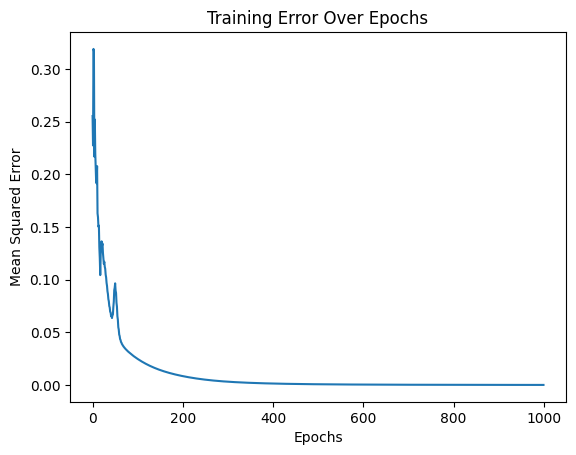

In [6]:

import matplotlib.pyplot as plt
# Plot the error
plt.plot(err)
plt.title('Training Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()


In [13]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import classification_report

# Assuming NN is a neural network instance and X is the input data
# Feedforward pass to get predictions
y_pred = np.argmax(NN.feedForward(X), axis=1)

# Assuming y is the true label
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       201

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



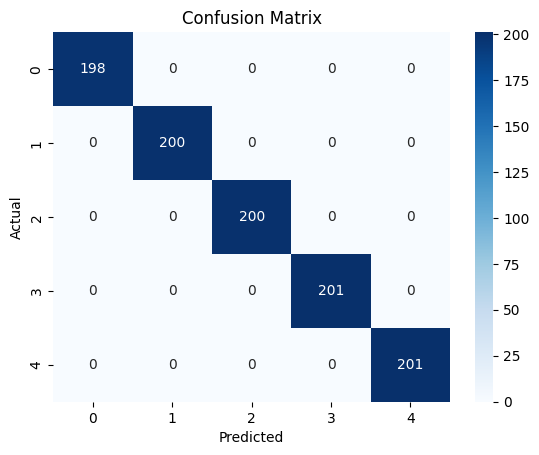

In [12]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()